# Discovering Sequential Frequent Patterns in Big Data Using PrefixSpan Algorithm

In this tutorial, we will discuss two approaches to find frequent patterns in big data using PrefixSpan algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing PrefixSpan on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PrefixSpan algorithm

In [1]:
from PAMI.sequentialPatternMining.basic import prefixSpan as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'sequence_retail.txt'

minimumSupportCount=1000  #Users can also specify this constraint between 0 to 1.

seperator='\t'       

#### Step 3: Execute the PrefixSpan algorithm

In [3]:
obj = alg.prefixSpan(iFile=inputFile, minSup=minimumSupportCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Frequent patterns were generated successfully using prefixSpan algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='frequentPatternsMinSupCount1000.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 181


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 6.181333303451538


In [8]:
##### Step 5.3: Total Memory consumed by the mining algorithm

In [9]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 151408640
Memory (USS): 112873472


# Advanced Tutorial on Implementing PrifixSpan Algorithm

***

#### In this tutorial, we explain how the PrefixSpan algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the PrefixSpan algorithm and pandas data frame

In [1]:
from PAMI.sequentialPatternMining.basic import prefixSpan as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'sequence_retail.txt'
seperator='\t'
minimumSupportCountList = [800, 900, 1000, 1100, 1200, 1300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PrifixSpan algorithm

#### Step 3: Execute the PrefixSpan algorithm using a for loop

In [3]:
algorithm = 'PrefixSpan'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.prefixSpan(inputFile, minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Frequent patterns were generated successfully using prefixSpan algorithm 
Frequent patterns were generated successfully using prefixSpan algorithm 
Frequent patterns were generated successfully using prefixSpan algorithm 
Frequent patterns were generated successfully using prefixSpan algorithm 
Frequent patterns were generated successfully using prefixSpan algorithm 
Frequent patterns were generated successfully using prefixSpan algorithm 


In [4]:
print(result)

    algorithm  minSup  patterns   runtime     memory
0  PrefixSpan     800       335  7.869312  156368896
1  PrefixSpan     900       315  7.615811  156307456
2  PrefixSpan    1000       181  6.216822  155189248
3  PrefixSpan    1100       169  6.028861  153870336
4  PrefixSpan    1200       100  4.938727  154169344
5  PrefixSpan    1300        69  4.216516  154169344


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

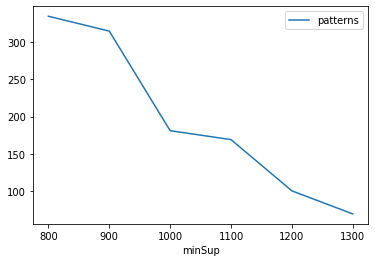

Graph for No Of Patterns is successfully generated!


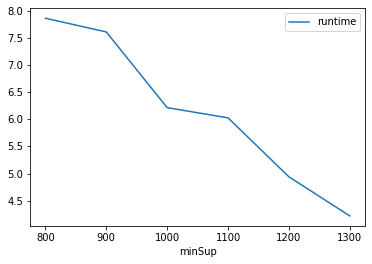

Graph for Runtime taken is successfully generated!


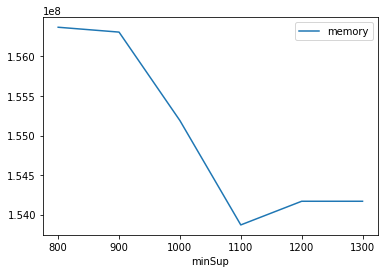

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
